# Préstamos#

*Los préstamos son operaciones financieras, por las que se cede una cantidad de dinero, que será devuelta junto con los intereses a un determinado plazo. Suelen ir acompañados de costes adicionales como gastos y comisiones*

**Tipos de Préstamos**

**Préstamo Fránces** *Se caracteriza por el pago de una cuota constante, compuesta por los intereses del capital pendiente más una cantidad destinada a la amortización del préstamo. Es el sistema más utilizado en el sistema bancario actual.*


*¿Qué necesitamos para poder calcular un préstamo francés?*

*En primer lugar, necesitamos conocer la cuota constante del préstamo. Para ello podemos utilizar la fórmula numpy financiero PMT que se corresponde a la fórmula de PAGO en Excel*

*Después calcularemos los intereses, multiplicando el capital pendiente por el tipo de interes*

*Finalmente, a la cuota obtenida mediante la fórmula PMT (PAGO en Excel) restaremos los intereses, y será la cuota de amortización. Con esto, finalizaremos el primer plazo, repitiendo la operación a lo largo de los periodos que dure el préstamo.*

*Vamos a ver un ejemplo, y para ello, lo primero que vamos a hacer es importar las librerías que vamos a utilizar en este documento*

In [1]:
pip install numpy-financial

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy_financial as npf
import numpy as np
import tabulate as tab
import matplotlib.pyplot as plt

*Préstamo de 100.000 euros, a devolver en 10 años a un 5% de interes*

In [4]:
#en primer lugar vamos a calcular la cuota constante

C0 = 100000
n = 10 
tasa = 0.05

pago = npf.pmt(rate=tasa, nper=n, pv=-C0, fv=0, when='end')
print(pago)

12950.457496545661


In [5]:
#Vamos a calcular el capital pendiente de cada periodo

pendiente = npf.fv(rate=tasa, nper =range(n+1), pmt = pago, pv= -C0)
print(pendiente)

[100000.          92049.54250345  83701.56213208  74936.18274214
  65732.5343827   56068.70360529  45921.68128901  35267.30785691
  24080.21575321  12333.76904433     -0.        ]


In [6]:
#Calculamos la amortización de cada año

amortz = npf.ppmt(rate=tasa, per=range(n+1), nper=n, pv=-C0, fv=0, when='end')
print(amortz)

[ 7571.86428242  7950.45749655  8347.98037137  8765.37938994
  9203.64835944  9663.83077741 10147.02231628 10654.3734321
 11187.0921037  11746.44670888 12333.76904433]


In [7]:
#Calculamos los intereses de cada periodo

interes = npf.ipmt(rate=tasa, per=range(n+1), nper=n, pv=-C0, fv=0)
print(interes)

[5378.59321412 5000.         4602.47712517 4185.0781066  3746.80913711
 3286.62671914 2803.43518026 2296.08406445 1763.36539285 1204.01078766
  616.68845222]


In [8]:
#Comprobamos

comprob = np.array(amortz + interes)
print(comprob)

[12950.45749655 12950.45749655 12950.45749655 12950.45749655
 12950.45749655 12950.45749655 12950.45749655 12950.45749655
 12950.45749655 12950.45749655 12950.45749655]


In [11]:
#Hacemos un cuadro de amortización para ver los datos con la librería tabulate
datos =[]
saldo = C0
saldo2 = 0
linea1 = [0,0,0,0,C0,0]
datos.append(linea1)

Anualidad = npf.pmt(rate=tasa, nper=n, pv=-C0, fv=0, when='end')

for i in range(1, n+1):
    pago_capital = npf.ppmt(rate=tasa, per=i, nper=n, pv=-C0, fv=0, when='end')
    pago_int = Anualidad - pago_capital
    saldo -= pago_capital
    saldo2 += pago_capital
    
    linea = [i, format(Anualidad, '.0f'),  format(pago_int, '.0f'), format(pago_capital, '.0f'), format(saldo, '.0f'), format(saldo2, '.0f')]
    
    datos.append(linea)
    
print(tab.tabulate(datos, headers= ['Periodo', 'Anualidad', 'Intereses', 'Amortización','Capital Vivo','Capital Amortizado'], tablefmt = 'psql'))
    

+-----------+-------------+-------------+----------------+----------------+----------------------+
|   Periodo |   Anualidad |   Intereses |   Amortización |   Capital Vivo |   Capital Amortizado |
|-----------+-------------+-------------+----------------+----------------+----------------------|
|         0 |           0 |           0 |              0 |         100000 |                    0 |
|         1 |       12950 |        5000 |           7950 |          92050 |                 7950 |
|         2 |       12950 |        4602 |           8348 |          83702 |                16298 |
|         3 |       12950 |        4185 |           8765 |          74936 |                25064 |
|         4 |       12950 |        3747 |           9204 |          65733 |                34267 |
|         5 |       12950 |        3287 |           9664 |          56069 |                43931 |
|         6 |       12950 |        2803 |          10147 |          45922 |                54078 |
|         

[]

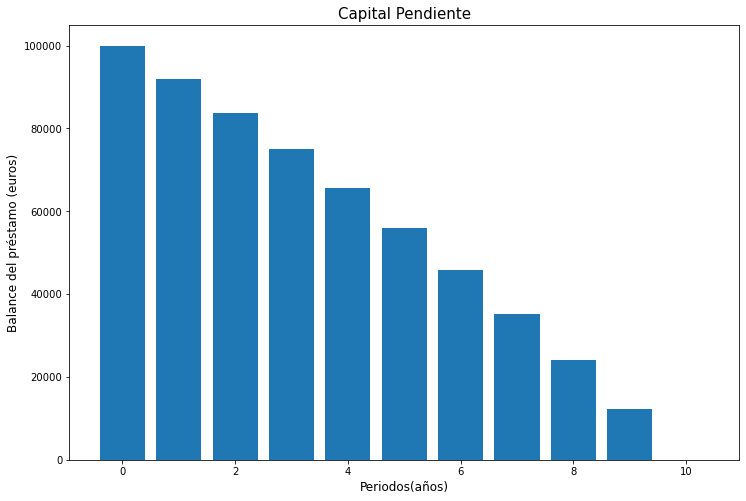

In [176]:
#Comprobemos como evoluciona nuestro prestamo en la siguiente gráfica

plt.figure(figsize = (12, 8))
plt.bar(range(0, n + 1), pendiente)
plt.title("Capital Pendiente", fontsize = 15)
plt.xlabel("Periodos(años)", fontsize = 12)
plt.ylabel("Balance del préstamo (euros)", fontsize = 12)
plt.plot()

[]

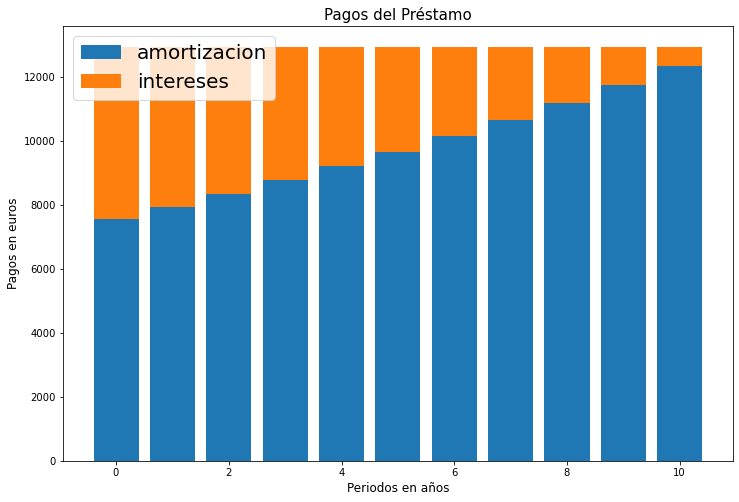

In [187]:
plt.figure(figsize = (12, 8))
plt.bar(range(0, n + 1), amortz, label = 'amortizacion')
plt.bar(range(0, n + 1), interes, bottom= amortz, label='intereses')
plt.legend(fontsize = 20)
plt.title("Pagos del Préstamo", fontsize = 15)
plt.xlabel("Periodos en años", fontsize = 12)
plt.ylabel("Pagos en euros", fontsize = 12)
plt.plot()

*En la gráfica podemos comprobar como al principio del préstamo se pagan casi más intereses que amortización, sin embargo al final del préstamo, se paga más amortización que intereses.*

**Préstamo Americano** *Se caracteriza por pagar tan solo intereses a lo largo de la vida del préstamo, amortizando todo el capital al final del periodo*

*Veamos un ejemplo*

*C0 = 100.000, n = 5, tasa = 0.07*

In [189]:
C0 = 100000
n = 5
tasa = 0.07

#La cuota serán los intereses del capital pendiente:

pago = round(C0*tasa,2)
print(pago)

7000.0


In [190]:
#La Amortización anual será cero

amortz = 0
print(amortz)

0


In [197]:
#Vamos a ver el cuadro de amortización

datos =[]
saldo = C0
saldo2 = 0
linea1 = [0,0,0,0,C0,0]
datos.append(linea1)

Anualidad = pago

for i in range(1, 5):
    pago_capital = 0
    pago_int = pago
    
    saldo2 += 0
    
    linea = [i, format(Anualidad, '.0f'),  format(pago_int, '.0f'), format(pago_capital, '.0f'), format(saldo, '.0f'), format(saldo2, '.0f')]
    
    datos.append(linea)
    
linea2 = [5,pago+C0,pago,C0,0,C0]
datos.append(linea2)
    
print(tab.tabulate(datos, headers= ['Periodo', 'Anualidad', 'Intereses', 'Amortización','Capital Vivo','Capital Amortizado'], tablefmt = 'psql'))
    

+-----------+-------------+-------------+----------------+----------------+----------------------+
|   Periodo |   Anualidad |   Intereses |   Amortización |   Capital Vivo |   Capital Amortizado |
|-----------+-------------+-------------+----------------+----------------+----------------------|
|         0 |           0 |           0 |              0 |         100000 |                    0 |
|         1 |        7000 |        7000 |              0 |         100000 |                    0 |
|         2 |        7000 |        7000 |              0 |         100000 |                    0 |
|         3 |        7000 |        7000 |              0 |         100000 |                    0 |
|         4 |        7000 |        7000 |              0 |         100000 |                    0 |
|         5 |      107000 |        7000 |         100000 |              0 |               100000 |
+-----------+-------------+-------------+----------------+----------------+----------------------+


**Préstamo Italiano** *Se caracteriza por tener una cuota de amortización constante, siendo la cuota variable a lo largo del periodo*

*Veamos un ejemplo*

*Capital = 100.000, años = 4 y tasa = 19%*

In [207]:
#Calculemos en primer lugar las amortizaciones

C0 = 100000
n = 4
tasa = 0.10
Amortz = []

for i in range(1,n+1):
    b = C0/n
    Amortz.append(b)
print(Amortz)

[25000.0, 25000.0, 25000.0, 25000.0]


In [240]:
#Después calculamos los intereses

pend = C0
inter = []

for i in range(1,n+1):
    a = pend * tasa
    inter.append(a)
    pend -= C0/n

print(inter)

[10000.0, 7500.0, 5000.0, 2500.0]


In [238]:
#Ya podemos hacer nuestro cuadro de amortización

datos =[]
saldo = C0
saldo2 = 0
linea1 = [0,0,0,0,C0,0]
datos.append(linea1)

for i in range(1, n+1):
    pago_capital = C0/n
    pago_int = saldo*tasa
    saldo -= pago_capital
    saldo2 += pago_capital
    Anualidad = pago_capital + pago_int
    linea = [i, format(Anualidad, '.0f'),  format(pago_int, '.0f'), format(pago_capital, '.0f'), format(saldo, '.0f'), format(saldo2, '.0f')]
    datos.append(linea)
    
print(tab.tabulate(datos, headers= ['Periodo', 'Anualidad', 'Intereses', 'Amortización','Capital Vivo','Capital Amortizado'], tablefmt = 'psql'))
    

+-----------+-------------+-------------+----------------+----------------+----------------------+
|   Periodo |   Anualidad |   Intereses |   Amortización |   Capital Vivo |   Capital Amortizado |
|-----------+-------------+-------------+----------------+----------------+----------------------|
|         0 |           0 |           0 |              0 |         100000 |                    0 |
|         1 |       35000 |       10000 |          25000 |          75000 |                25000 |
|         2 |       32500 |        7500 |          25000 |          50000 |                50000 |
|         3 |       30000 |        5000 |          25000 |          25000 |                75000 |
|         4 |       27500 |        2500 |          25000 |              0 |               100000 |
+-----------+-------------+-------------+----------------+----------------+----------------------+
